This notebook demostrates the creation of some Extensive Form Games (EFGs), all of them versions of the Iterated Prisoner's Dilemma game, from the Prolog description of an action situation according to the syntax of *if-then-where* rules.

In [1]:
import sys
sys.path.append('/Users/nmontes/OneDrive/Documentos/PhD/norms-games/norms-games')
import matplotlib.pyplot as plt
from extensivegames import ExtensiveFormGame, plot_game, backward_induction,\
subgame_perfect_equilibrium, DFS_equilibria_paths
from build import build_full_game

# Default rules

Agent are allowed to cooperate and defect whenever.

In [2]:
folder = "ipd-default"
identifier = "ipd"
game_ipd_default = build_full_game(folder, identifier)

In [3]:
def set_utility(game):
    r"""Set the utility of the game at the terminal nodes.
    
    Set the utility at the terminal nodes to the payoff the agents have
    received. Other possibilities are possible (e.g. consider equality).
    """
    for n in game.game_tree.terminal_nodes:
        node_utility = {}
        facts = game.node_info[n]
        for f in facts:
            predicate = f.split('(')[0]
            args = f.split('(')[1][:-1].split(', ')
            if predicate == 'payoff':
                node_utility[args[0]] = float(args[1])
        game.set_utility(n, node_utility)

In [4]:
set_utility(game_ipd_default)

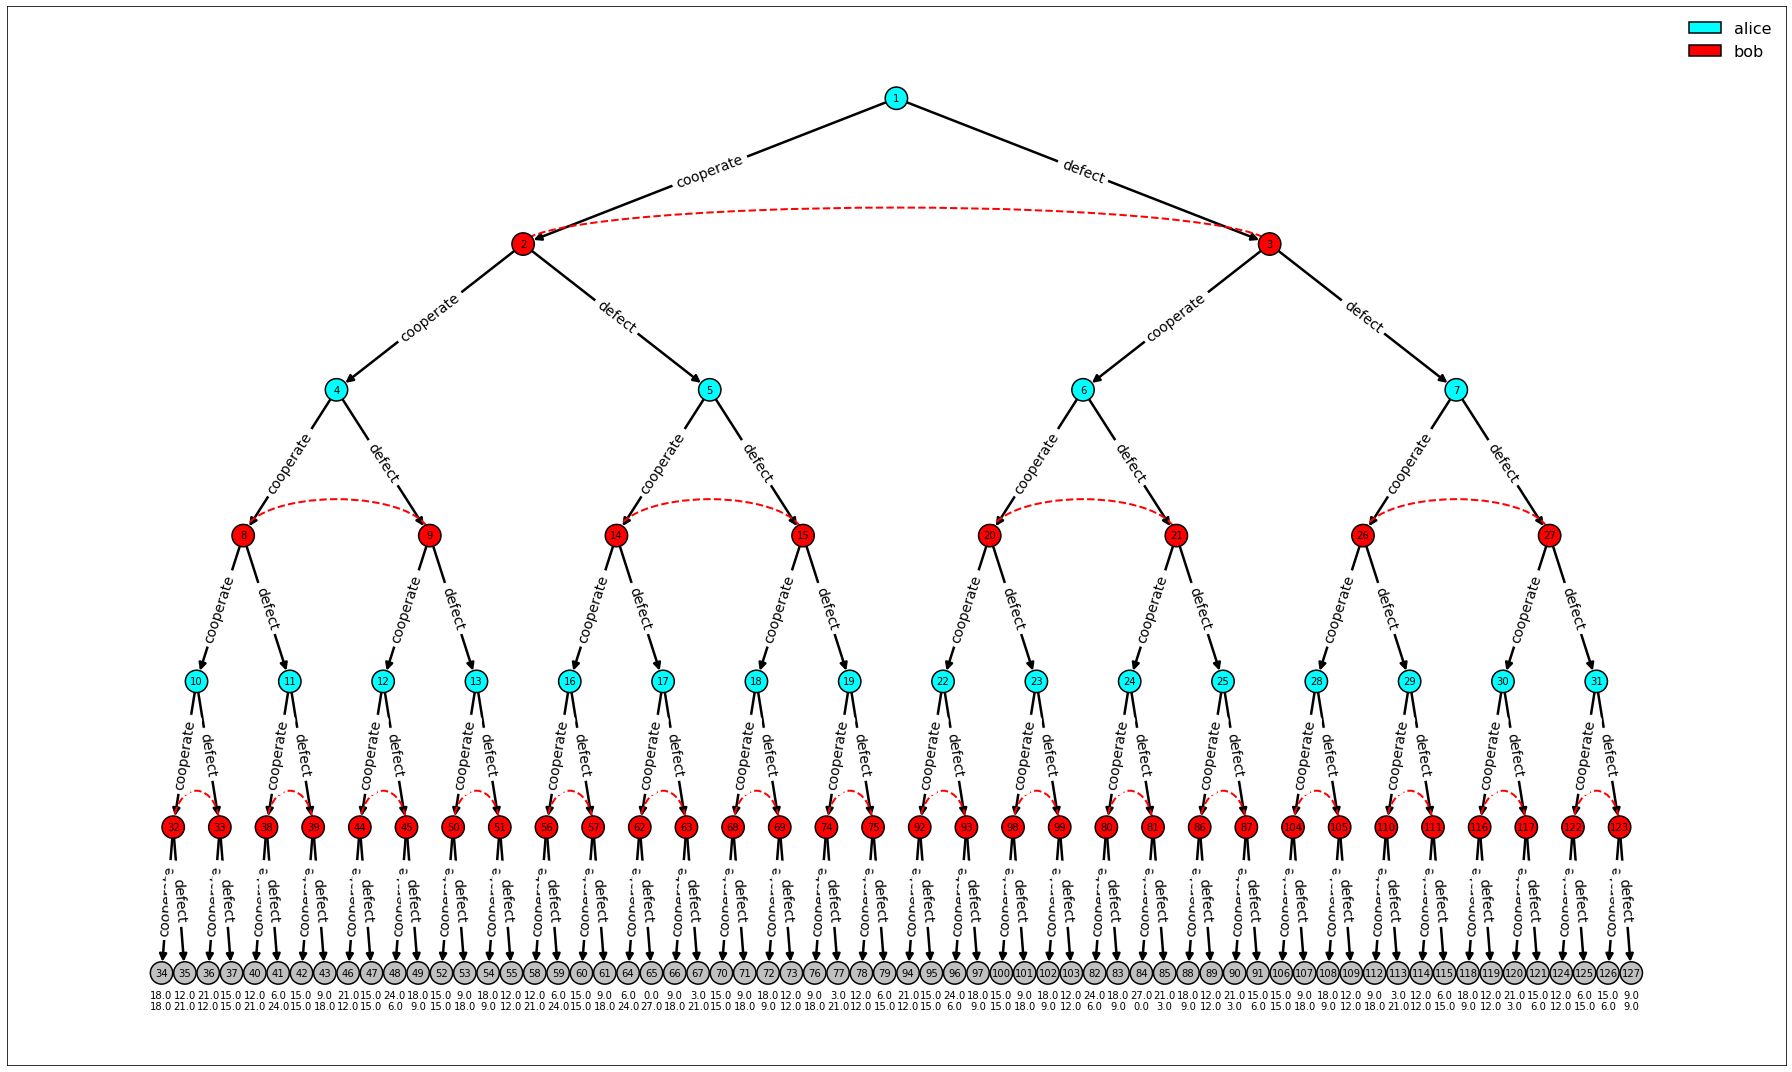

In [5]:
position_colors =  {'alice':'cyan', 'bob':'red'}

# default keywords for rendering the figure
my_fig_kwargs = dict(figsize=(25,15), frameon=False, tight_layout=True)
my_node_kwargs = dict(font_size=10, node_size=500, edgecolors='k',
                      linewidths=1.5)
my_edge_kwargs = dict(arrowsize=15, width=2.5)
my_edge_labels_kwargs = dict(font_size=14)
my_patch_kwargs = dict(linewidth=1.5)
my_legend_kwargs = dict(fontsize=16, loc='upper right', edgecolor='white')
my_utility_label_kwargs = dict(horizontalalignment='center', fontsize=10)
my_info_sets_kwargs = dict(linestyle='--', linewidth=2)

fig = plot_game(game_ipd_default, 
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                utility_label_shift=0.05,
                info_sets_kwargs=my_info_sets_kwargs)

# fig.savefig('ipd_default.png', bbox_inches='tight', dpi=500)

In [6]:
spe = subgame_perfect_equilibrium(game_ipd_default)
path_store = []
DFS_equilibria_paths(game_ipd_default, game_ipd_default.game_tree.root, spe, [],
                     1, path_store)
print("Path -- Probability")
print("-------------------")
for (path, prob) in path_store:
    print("{} -- {:.2f}".format(path, prob))

Path -- Probability
-------------------
[1, 'defect', 3, 'defect', 7, 'defect', 27, 'defect', 31, 'defect', 123, 'defect', 127] -- 1.00


# Limit consecutive defections

Agent are not allowed to defect more than twice in a row.

In [7]:
folder = "ipd-limit-defections"
identifier = "ipd"
game_ipd_limit_defections = build_full_game(folder, identifier)

In [8]:
set_utility(game_ipd_limit_defections)

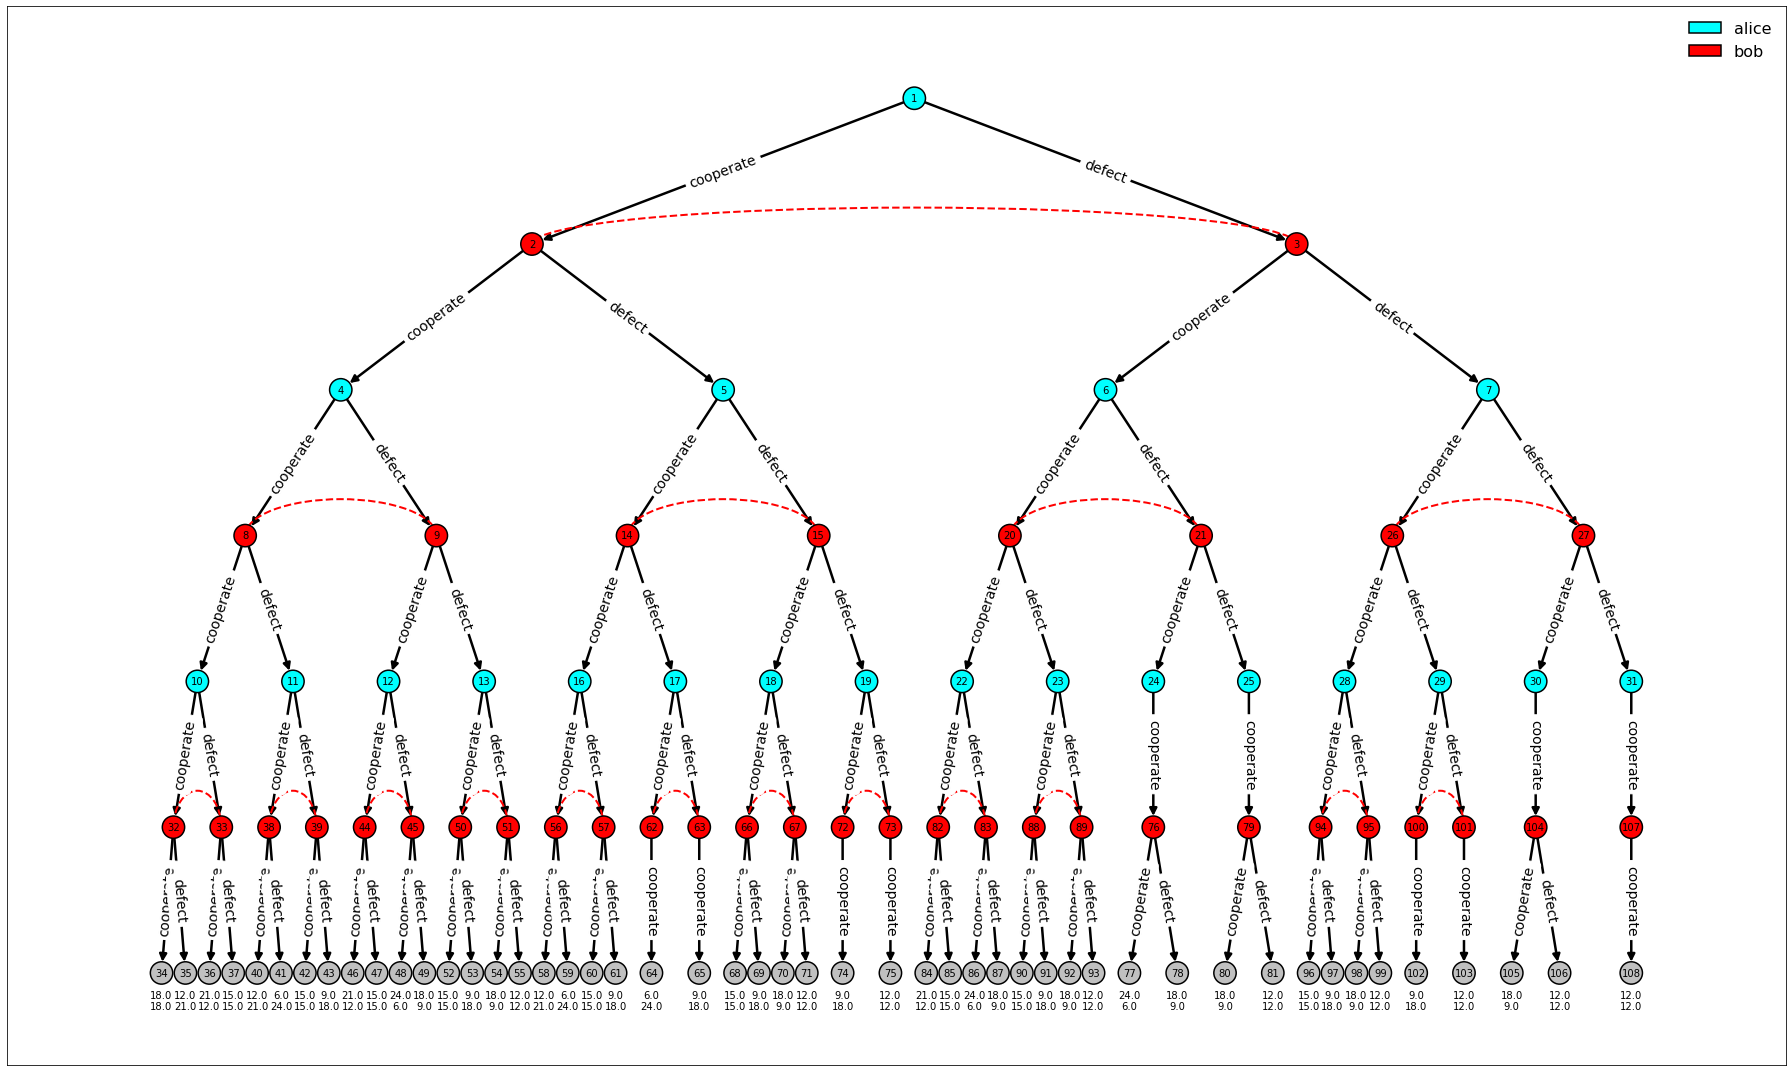

In [9]:
fig = plot_game(game_ipd_limit_defections, 
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                utility_label_shift=0.05,
                info_sets_kwargs=my_info_sets_kwargs)

# fig.savefig('ipd_limit_defections.png', bbox_inches='tight', dpi=500)

In [10]:
spe = subgame_perfect_equilibrium(game_ipd_limit_defections)
path_store = []
DFS_equilibria_paths(game_ipd_limit_defections,
                     game_ipd_limit_defections.game_tree.root, spe, [], 1,
                     path_store)
print("Path -- Probability")
print("-------------------")
for (path, prob) in path_store:
    print("{} -- {:.2f}".format(path, prob))

Path -- Probability
-------------------
[1, 'cooperate', 2, 'cooperate', 4, 'defect', 9, 'defect', 13, 'defect', 51, 'defect', 55] -- 1.00


# Penalize mutual defection

If both agents defect, the outcome is *as if* one agent had defected on the other. The agent that acts as the defector is selected randomly.

The generated game for this configuration is limited to 2 rounds.

In [11]:
folder = "ipd-ban-mutual-defect"
identifier = "ipd"
game_ipd_ban_mutual_defect = build_full_game(folder, identifier)

In [12]:
set_utility(game_ipd_ban_mutual_defect)

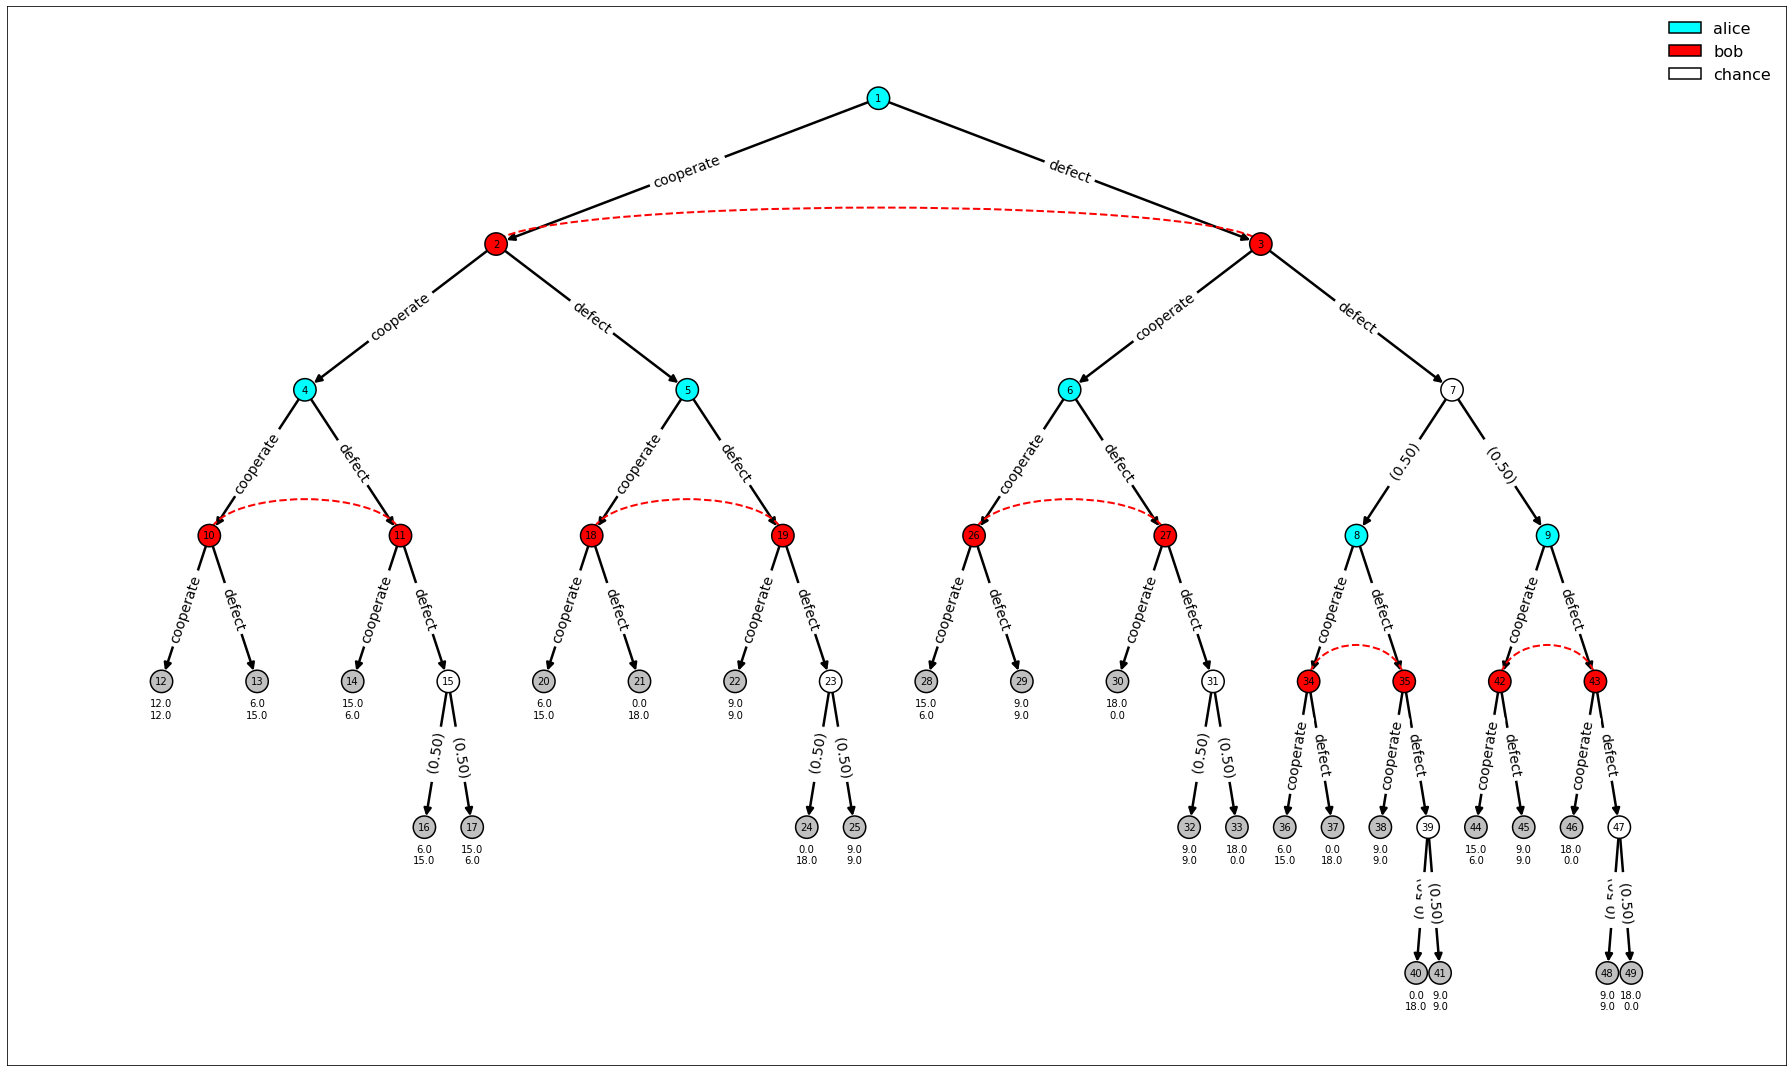

In [13]:
fig = plot_game(game_ipd_ban_mutual_defect, 
                position_colors,
                fig_kwargs=my_fig_kwargs,
                node_kwargs=my_node_kwargs,
                edge_kwargs=my_edge_kwargs,
                edge_labels_kwargs=my_edge_labels_kwargs,
                patch_kwargs=my_patch_kwargs,
                legend_kwargs=my_legend_kwargs,
                utility_label_kwargs=my_utility_label_kwargs,
                utility_label_shift=0.05,
                info_sets_kwargs=my_info_sets_kwargs)

# fig.savefig('ipd_ban_mutual_defect.png', bbox_inches='tight', dpi=500)

In [14]:
spe = subgame_perfect_equilibrium(game_ipd_ban_mutual_defect)
path_store = []
DFS_equilibria_paths(game_ipd_ban_mutual_defect,
                     game_ipd_ban_mutual_defect.game_tree.root, spe, [], 1,
                     path_store)
print("Path -- Probability")
print("-------------------")
for (path, prob) in path_store:
    print("{} -- {:.2f}".format(path, prob))

Path -- Probability
-------------------
[1, 'defect', 3, 'defect', 7, '', 8, 'defect', 35, 'defect', 39, '', 40] -- 0.25
[1, 'defect', 3, 'defect', 7, '', 8, 'defect', 35, 'defect', 39, '', 41] -- 0.25
[1, 'defect', 3, 'defect', 7, '', 9, 'defect', 43, 'defect', 47, '', 48] -- 0.25
[1, 'defect', 3, 'defect', 7, '', 9, 'defect', 43, 'defect', 47, '', 49] -- 0.25
